## <center> Gráfico da amplitude x tempo e amplitude x frequência do geofone SM-24 <center>
#### <center> Oscilação na ponte medidas em 27/11/2018 (Vibração), N = 600.000, $\delta t = 0.002s$, $\delta t total = 1200s$; ADC @ 860 Hz & gain 16 <center>                        

#### <center> Local: Ponte no bairro Vila do Sul. Condições do ambiente: pessoas caminhando, tráfego de carros, motos e caminhão constantemente. O Rio sob a ponte era bastante ruidoso <center>

##### <center>  Nome: Luiz Felipe Lempe<center>     

In [83]:
import matplotlib.pyplot as plt
import numpy as np

Importa arquivo de dados '.csv' com 2a coluna sendo tensão (V) analógica do geofone e 3a coluna sendo aceleração em g do acelerômetro LSM303D :

In [84]:
col1 = np.genfromtxt('dados.csv', usecols=[1], delimiter=',', skip_header=1)

Limita os valores de lista que deseja usar. Exemplo: col1 = 2014. col1[:len(col1)//2] = 1024;
col1[100:1000] => pega os dados do 101 até o 1000 :

In [85]:
col1 = col1[:600000]

In [86]:
num_medidas = len(col1)
num_medidas

600000

In [87]:
dT = 0.002 # Intervalo de amostragem
Fs = 1/dT  # Taxa de Amostragem (samples/s ou Hz);
print("Taxa de amostragem: {} Hz".format(Fs))
print("Resolução em frequência dF = Fs/N: {} Hz".format(Fs/num_medidas))

Taxa de amostragem: 500.0 Hz
Resolução em frequência dF = Fs/N: 0.000833333333333 Hz


In [88]:
y = np.array(col1)
print("lista y tem {} valores".format(len(y)))
#y

lista y tem 600000 valores


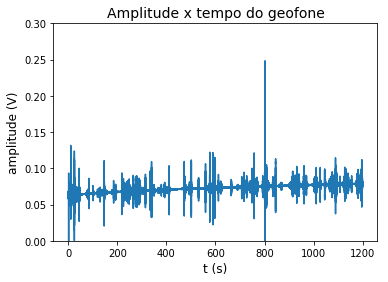

In [89]:
#Grafico no dominio do tempo
fig = plt.figure()
plt.xlabel("t (s)", fontsize=12)
plt.ylabel("amplitude (V)", fontsize=12)
plt.title(u'Amplitude x tempo do geofone', fontsize=14) 
plt.gcf().subplots_adjust (left=0.15)  # evita que o título do eixo y seja cortado ao ser salva a figura.
plt.plot(t, y);
plt.ylim(ymin=0, ymax=0.30);
fig.savefig("Amplitude_cte_geofone.png")
#plt.show()

In [90]:
n = len(y)   # Número de elementos do sinal y(t) x t
n

600000

In [91]:
k = np.arange(n)


Uma lista $y(t)$ com $n$ elementos obtidos a uma taxa de amostragem de $F_s = 1/ \delta t$, tem um intervalo de tempo $T = n\, \delta t = n/F_s$, onde $T = T_f - T_i$ :

In [92]:
T = n/Fs
T

1200.0

In [93]:
frqorig = k/T   # Faixa de frequencia de dois lados


In [94]:
frq = frqorig[range(n//2)]   # Faixa de frequencia de dois lados


In [95]:
Y = np.fft.fft(y)/n   # Computando FFT e normatizando


In [96]:
Y = Y[range(n//2)]


In [97]:
Y[0] = 0.0 + 0.0j


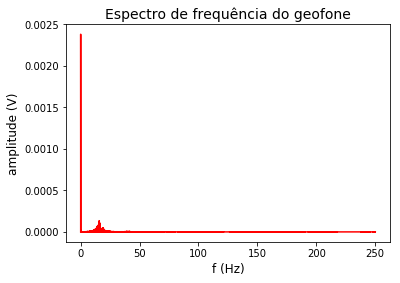

In [98]:
#Grafico no dominio da frequencia
fig = plt.figure()
plt.xlabel("f (Hz)", fontsize=12)
plt.ylabel("amplitude (V)",fontsize=12)
#pylab.ylim([-1.1,5])
#pylab.xlim([0,250])
plt.gcf().subplots_adjust (left=0.15) # evita que o título do eixo y seja cortado ao ser salva a figura.
plt.title(u'Espectro de frequência do geofone', fontsize=14)
plt.plot(frq, abs(Y), 'r');
fig.savefig("FFT_geofone.png")
#plt.show()